In [1]:
# # import libraries and convert to dataframe
# import pandas as pd

# df_bcn = pd.read_csv('Datasets/Final_cleaned_dataset/labled_features_bcn.csv', on_bad_lines='skip')
# df_mad = pd.read_csv('Datasets/Final_cleaned_dataset/labled_features_mad.csv', on_bad_lines='skip')

In [2]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# Calculate z-scores for price
z_scores_bcn = np.abs(stats.zscore(df_bcn['price']))
z_scores_mad = np.abs(stats.zscore(df_mad['price']))

# Define a threshold
threshold = 3

# Remove outliers
df_bcn = df_bcn[(z_scores_bcn < threshold)]
df_mad = df_mad[(z_scores_mad < threshold)]

# Find and remove rows where 'neighbourhood' is "Sant Andreu" or "Gracias" and 'distance to city center' is less than 1 km
df_bcn = df_bcn[~((df_bcn['neighbourhood_group_cleansed'] == 'Sant Andreu') & (df_bcn['distance_from_city_center'] == '<1 km'))]
df_bcn = df_bcn[~((df_bcn['neighbourhood_group_cleansed'] == 'Gràcia') & (df_bcn['distance_from_city_center'] == '<1 km'))]

from sklearn.preprocessing import StandardScaler

# Select only the continuous numerical columns to normalize
continuous_columns_bcn = ['price', 'distance_from_city_center', 'number_of_reviews', 'review_scores_rating']
continuous_columns_mad = ['price', 'distance_from_city_center', 'number_of_reviews', 'review_scores_rating']

# Initialize the scaler
scaler = StandardScaler()

# Normalize only the continuous columns
df_bcn[continuous_columns_bcn] = scaler.fit_transform(df_bcn[continuous_columns_bcn])
df_mad[continuous_columns_mad] = scaler.fit_transform(df_mad[continuous_columns_mad])

# Leave the binary and ordinal encoded variables as they are
binary_columns = ['host_is_superhost', 'kitchen', 'patio or balcony', 'elevator', 'air conditioning']
ordinal_columns = ['bedrooms_encoded', 'room_type_encoded']

# No need to scale these columns
df_bcn[binary_columns + ordinal_columns] = df_bcn[binary_columns + ordinal_columns]
df_mad[binary_columns + ordinal_columns] = df_mad[binary_columns + ordinal_columns]


In [5]:
df_bcn.head()

,id,neighbourhood_group_cleansed,name,host_id,host_name,host_is_superhost,calculated_host_listings_count,latitude,longitude,kitchen,...,elevator,air conditioning,number_of_reviews,review_scores_rating,room_type_encoded,bedrooms_encoded,price,price_category,distance_from_city_center,distance_category
0,269467,Eixample,Sunny and quiet Loft next to Sagrada Familia,1411775,Jeremies,f,3,41.401810,2.17610,1,...,0,1,0.311281,0.557980,2,0,-0.189872,Economic,-0.147837,1-2 km
1,18674,Eixample,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,f,27,41.405560,2.17262,1,...,1,0,-0.152734,0.350257,2,1,0.362514,Luxury,0.127667,2-3 km
2,272282,Eixample,CHARMING; VERY SPACIOUS & BEST LOCATED,1425070,Mar,t,1,41.383470,2.15802,1,...,1,1,3.379462,0.653852,2,1,0.239761,Luxury,-0.767587,<1 km
3,23197,Sant Martí,Forum CCIB DeLuxe; Spacious; Large Balcony; relax,90417,Etain (Marnie),f,1,41.412432,2.21975,1,...,1,0,0.197645,0.584611,2,1,0.307957,Luxury,2.696240,5-8 km
4,32711,Gràcia,Sagrada Familia area - Còrsega 1,135703,Nick,f,2,41.405660,2.17015,1,...,1,0,0.604842,0.408845,2,1,0.246581,Luxury,0.117197,2-3 km


In [6]:
print(df_bcn.columns.tolist())

# print(df_bcn['host_is_superhost'].unique())
# print(df_mad['host_is_superhost'].unique())

['id', 'neighbourhood_group_cleansed', 'name', 'host_id', 'host_name', 'host_is_superhost', 'calculated_host_listings_count', 'latitude', 'longitude', 'kitchen', 'patio or balcony', 'elevator', 'air conditioning', 'number_of_reviews', 'review_scores_rating', 'room_type_encoded', 'bedrooms_encoded', 'price', 'price_category', 'distance_from_city_center', 'distance_category']


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize models
model_bcn = LinearRegression()
model_mad = LinearRegression()

# Train models
model_bcn.fit(X_train_bcn, y_train_bcn)
model_mad.fit(X_train_mad, y_train_mad)


LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_bcn = model_bcn.predict(X_test_bcn)
y_pred_mad = model_mad.predict(X_test_mad)

# Evaluation for Barcelona
mae_bcn = mean_absolute_error(y_test_bcn, y_pred_bcn)
mse_bcn = mean_squared_error(y_test_bcn, y_pred_bcn)
rmse_bcn = np.sqrt(mse_bcn)
r2_bcn = r2_score(y_test_bcn, y_pred_bcn)

print("Barcelona Model Performance:")
print(f"MAE: {mae_bcn:.2f}")
print(f"MSE: {mse_bcn:.2f}")
print(f"RMSE: {rmse_bcn:.2f}")
print(f"R²: {r2_bcn:.2f}")

# Evaluation for Madrid
mae_mad = mean_absolute_error(y_test_mad, y_pred_mad)
mse_mad = mean_squared_error(y_test_mad, y_pred_mad)
rmse_mad = np.sqrt(mse_mad)
r2_mad = r2_score(y_test_mad, y_pred_mad)

print("\nMadrid Model Performance:")
print(f"MAE: {mae_mad:.2f}")
print(f"MSE: {mse_mad:.2f}")
print(f"RMSE: {rmse_mad:.2f}")
print(f"R²: {r2_mad:.2f}")

Barcelona Model Performance:
MAE: 91.00
MSE: 18414.38
RMSE: 135.70
R²: 0.24

Madrid Model Performance:
MAE: 49.50
MSE: 5660.75
RMSE: 75.24
R²: 0.26


In [14]:
# Barcelona Coefficients
coef_bcn = model_bcn.coef_
intercept_bcn = model_bcn.intercept_

print("Barcelona Model Coefficients:")
for feature, coef in zip(X_bcn.columns, coef_bcn):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept_bcn:.2f}")

# Madrid Coefficients
coef_mad = model_mad.coef_
intercept_mad = model_mad.intercept_

print("\nMadrid Model Coefficients:")
for feature, coef in zip(X_mad.columns, coef_mad):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept_mad:.2f}")


Barcelona Model Coefficients:
distance_from_city_center: -20.25
host_is_superhost: -0.89
kitchen: -31.28
patio or balcony: -2.88
elevator: 31.39
air conditioning: 30.73
room_type_encoded: 41.16
bedrooms_encoded: 72.41
number_of_reviews: 0.02
review_scores_rating: 1.76
Intercept: 128.06

Madrid Model Coefficients:
distance_from_city_center: -5.92
host_is_superhost: 5.33
kitchen: -19.53
patio or balcony: 10.73
elevator: 15.18
air conditioning: 16.07
room_type_encoded: 33.56
bedrooms_encoded: 59.13
number_of_reviews: -0.08
review_scores_rating: -1.21
Intercept: 75.19


### Random Forest Regressor

In [15]:
# For Barcelona
X_bcn = df_bcn[['distance_from_city_center', 'host_is_superhost', 'kitchen', 'patio or balcony',
                'elevator', 'air conditioning', 'room_type_encoded', 'bedrooms_encoded',
                'number_of_reviews', 'review_scores_rating']]
y_bcn = df_bcn['price']

# For Madrid
X_mad = df_mad[['distance_from_city_center', 'host_is_superhost', 'kitchen', 'patio or balcony',
                'elevator', 'air conditioning', 'room_type_encoded', 'bedrooms_encoded',
                'number_of_reviews', 'review_scores_rating']]
y_mad = df_mad['price']


In [16]:
# Barcelona
X_train_bcn, X_test_bcn, y_train_bcn, y_test_bcn = train_test_split(
    X_bcn, y_bcn, test_size=0.2, random_state=42
)

# Madrid
X_train_mad, X_test_mad, y_train_mad, y_test_mad = train_test_split(
    X_mad, y_mad, test_size=0.2, random_state=42
)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model_bcn = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_mad = RandomForestRegressor(n_estimators=100, random_state=42)


In [18]:
# Train the model for Barcelona
rf_model_bcn.fit(X_train_bcn, y_train_bcn)

# Train the model for Madrid
rf_model_mad.fit(X_train_mad, y_train_mad)


RandomForestRegressor(random_state=42)

In [19]:
# Predictions for Barcelona
y_pred_rf_bcn = rf_model_bcn.predict(X_test_bcn)

# Predictions for Madrid
y_pred_rf_mad = rf_model_mad.predict(X_test_mad)


In [20]:
# Evaluation for Barcelona
mae_rf_bcn = mean_absolute_error(y_test_bcn, y_pred_rf_bcn)
mse_rf_bcn = mean_squared_error(y_test_bcn, y_pred_rf_bcn)
rmse_rf_bcn = np.sqrt(mse_rf_bcn)
r2_rf_bcn = r2_score(y_test_bcn, y_pred_rf_bcn)

print("Random Forest - Barcelona:")
print(f"MAE: {mae_rf_bcn:.2f}")
print(f"MSE: {mse_rf_bcn:.2f}")
print(f"RMSE: {rmse_rf_bcn:.2f}")
print(f"R²: {r2_rf_bcn:.2f}")

# Evaluation for Madrid
mae_rf_mad = mean_absolute_error(y_test_mad, y_pred_rf_mad)
mse_rf_mad = mean_squared_error(y_test_mad, y_pred_rf_mad)
rmse_rf_mad = np.sqrt(mse_rf_mad)
r2_rf_mad = r2_score(y_test_mad, y_pred_rf_mad)

print("\nRandom Forest - Madrid:")
print(f"MAE: {mae_rf_mad:.2f}")
print(f"MSE: {mse_rf_mad:.2f}")
print(f"RMSE: {rmse_rf_mad:.2f}")
print(f"R²: {r2_rf_mad:.2f}")


Random Forest - Barcelona:
MAE: 84.01
MSE: 16074.96
RMSE: 126.79
R²: 0.34

Random Forest - Madrid:
MAE: 47.29
MSE: 5532.58
RMSE: 74.38
R²: 0.28


In [21]:
# Feature importance for Barcelona
feature_importance_bcn = rf_model_bcn.feature_importances_
feature_names_bcn = X_bcn.columns

# Plotting the feature importance for Barcelona
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_bcn, y=feature_names_bcn)
plt.title('Feature Importance - Barcelona')
plt.show()

# Feature importance for Madrid
feature_importance_mad = rf_model_mad.feature_importances_
feature_names_mad = X_mad.columns

# Plotting the feature importance for Madrid
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_mad, y=feature_names_mad)
plt.title('Feature Importance - Madrid')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search for Barcelona
grid_search_bcn = GridSearchCV(estimator=rf_model_bcn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_bcn.fit(X_train_bcn, y_train_bcn)

print(f"Best Parameters for Barcelona: {grid_search_bcn.best_params_}")

# Grid search for Madrid
grid_search_mad = GridSearchCV(estimator=rf_model_mad, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_mad.fit(X_train_mad, y_train_mad)

print(f"Best Parameters for Madrid: {grid_search_mad.best_params_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Barcelona: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  10.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  10.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  16.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  16.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   9.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  16.9s
[CV] END bootstrap=False, max_depth=20, min_samples_l

In [ ]:
# Re-initialize with best parameters
best_rf_model_bcn = RandomForestRegressor(**grid_search_bcn.best_params_)
best_rf_model_bcn.fit(X_train_bcn, y_train_bcn)
y_pred_best_rf_bcn = best_rf_model_bcn.predict(X_test_bcn)

best_rf_model_mad = RandomForestRegressor(**grid_search_mad.best_params_)
best_rf_model_mad.fit(X_train_mad, y_train_mad)
y_pred_best_rf_mad = best_rf_model_mad.predict(X_test_mad)

# Evaluate the tuned model
mae_best_rf_bcn = mean_absolute_error(y_test_bcn, y_pred_best_rf_bcn)
r2_best_rf_bcn = r2_score(y_test_bcn, y_pred_best_rf_bcn)

mae_best_rf_mad = mean_absolute_error(y_test_mad, y_pred_best_rf_mad)
r2_best_rf_mad = r2_score(y_test_mad, y_pred_best_rf_mad)

print(f"Tuned Random Forest - Barcelona: MAE: {mae_best_rf_bcn:.2f}, R²: {r2_best_rf_bcn:.2f}")
print(f"Tuned Random Forest - Madrid: MAE: {mae_best_rf_mad:.2f}, R²: {r2_best_rf_mad:.2f}")


Tuned Random Forest - Barcelona: MAE: 106.84, R²: 0.07
Tuned Random Forest - Madrid: MAE: 61.20, R²: 0.05


### Visualizing feature importances 

In [ ]:
# Feature importance for Barcelona
feature_importance_bcn = rf_model_bcn.feature_importances_
feature_names_bcn = X_bcn.columns

# Feature importance for Madrid
feature_importance_mad = rf_model_mad.feature_importances_
feature_names_mad = X_mad.columns


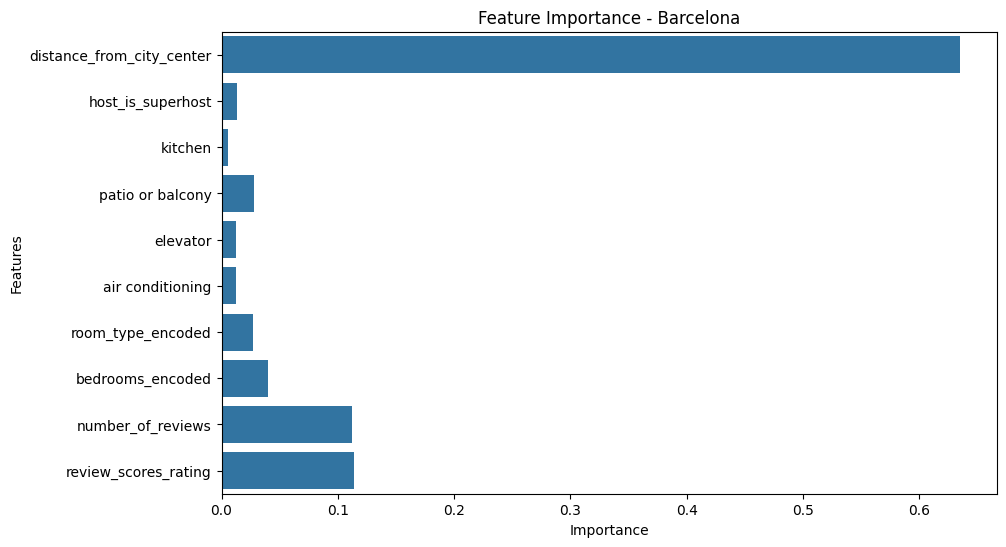

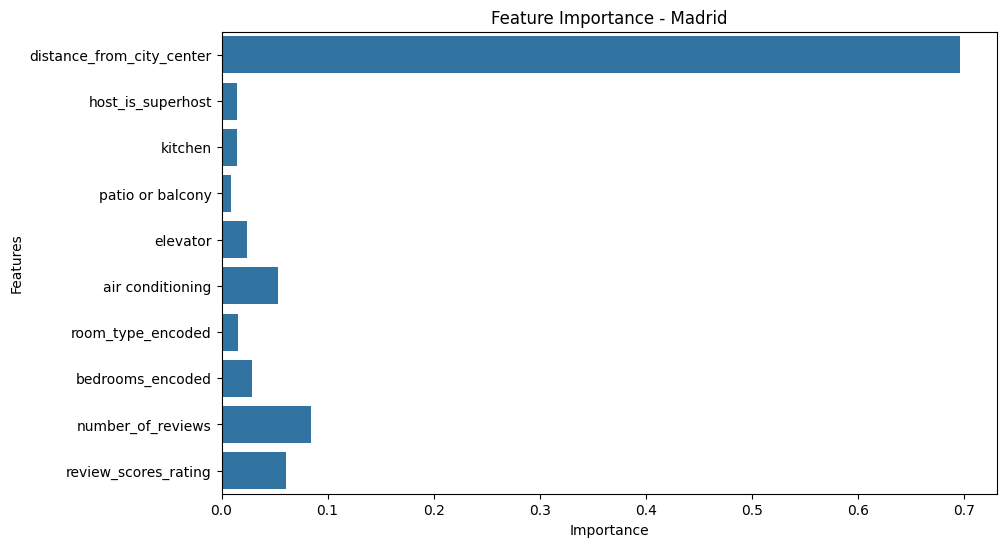

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barcelona Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_bcn, y=feature_names_bcn)
plt.title('Feature Importance - Barcelona')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Madrid Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_mad, y=feature_names_mad)
plt.title('Feature Importance - Madrid')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder_bcn = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid multicollinearity

# List of categorical columns for Barcelona
categorical_columns_bcn = ['distance_category', 'price_category', 'host_is_superhost', 
                           'kitchen', 'patio or balcony', 'elevator', 
                           'air conditioning', 'room_type_encoded', 'bedrooms_encoded']

# Encode the categorical columns
X_bcn_encoded = encoder_bcn.fit_transform(df_bcn[categorical_columns_bcn])

# Convert to DataFrame for easy manipulation and column naming
X_bcn_encoded_df = pd.DataFrame(X_bcn_encoded, columns=encoder_bcn.get_feature_names_out(categorical_columns_bcn))

# The target variable
y_bcn = df_bcn['price']


In [ ]:
# Initialize OneHotEncoder for Madrid
encoder_mad = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid multicollinearity

# List of categorical columns for Madrid
categorical_columns_mad = ['distance_category', 'price_category', 'host_is_superhost', 
                           'kitchen', 'patio or balcony', 'elevator', 
                           'air conditioning', 'room_type_encoded', 'bedrooms_encoded']

# Encode the categorical columns
X_mad_encoded = encoder_mad.fit_transform(df_mad[categorical_columns_mad])

# Convert to DataFrame for easy manipulation and column naming
X_mad_encoded_df = pd.DataFrame(X_mad_encoded, columns=encoder_mad.get_feature_names_out(categorical_columns_mad))

# The target variable
y_mad = df_mad['price']


In [ ]:
from sklearn.model_selection import train_test_split

# Barcelona Train-Test Split
X_train_bcn, X_test_bcn, y_train_bcn, y_test_bcn = train_test_split(
    X_bcn_encoded_df, y_bcn, test_size=0.2, random_state=42
)

# Madrid Train-Test Split
X_train_mad, X_test_mad, y_train_mad, y_test_mad = train_test_split(
    X_mad_encoded_df, y_mad, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model_bcn = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_mad = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model for Barcelona
rf_model_bcn.fit(X_train_bcn, y_train_bcn)

# Train the model for Madrid
rf_model_mad.fit(X_train_mad, y_train_mad)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions for Barcelona
y_pred_rf_bcn = rf_model_bcn.predict(X_test_bcn)

# Predictions for Madrid
y_pred_rf_mad = rf_model_mad.predict(X_test_mad)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation for Barcelona
mae_rf_bcn = mean_absolute_error(y_test_bcn, y_pred_rf_bcn)
mse_rf_bcn = mean_squared_error(y_test_bcn, y_pred_rf_bcn)
rmse_rf_bcn = np.sqrt(mse_rf_bcn)
r2_rf_bcn = r2_score(y_test_bcn, y_pred_rf_bcn)

print("Random Forest - Barcelona:")
print(f"MAE: {mae_rf_bcn:.2f}")
print(f"MSE: {mse_rf_bcn:.2f}")
print(f"RMSE: {rmse_rf_bcn:.2f}")
print(f"R²: {r2_rf_bcn:.2f}")

# Evaluation for Madrid
mae_rf_mad = mean_absolute_error(y_test_mad, y_pred_rf_mad)
mse_rf_mad = mean_squared_error(y_test_mad, y_pred_rf_mad)
rmse_rf_mad = np.sqrt(mse_rf_mad)
r2_rf_mad = r2_score(y_test_mad, y_pred_rf_mad)

print("\nRandom Forest - Madrid:")
print(f"MAE: {mae_rf_mad:.2f}")
print(f"MSE: {mse_rf_mad:.2f}")
print(f"RMSE: {rmse_rf_mad:.2f}")
print(f"R²: {r2_rf_mad:.2f}")


Random Forest - Barcelona:
MAE: 51.45
MSE: 9911.15
RMSE: 99.55
R²: 0.59

Random Forest - Madrid:
MAE: 28.47
MSE: 3036.37
RMSE: 55.10
R²: 0.61


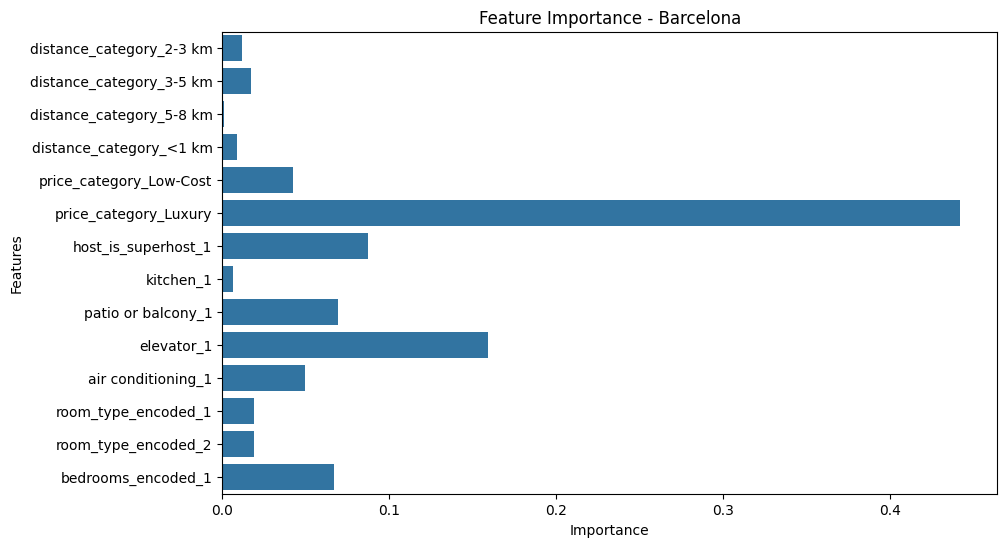

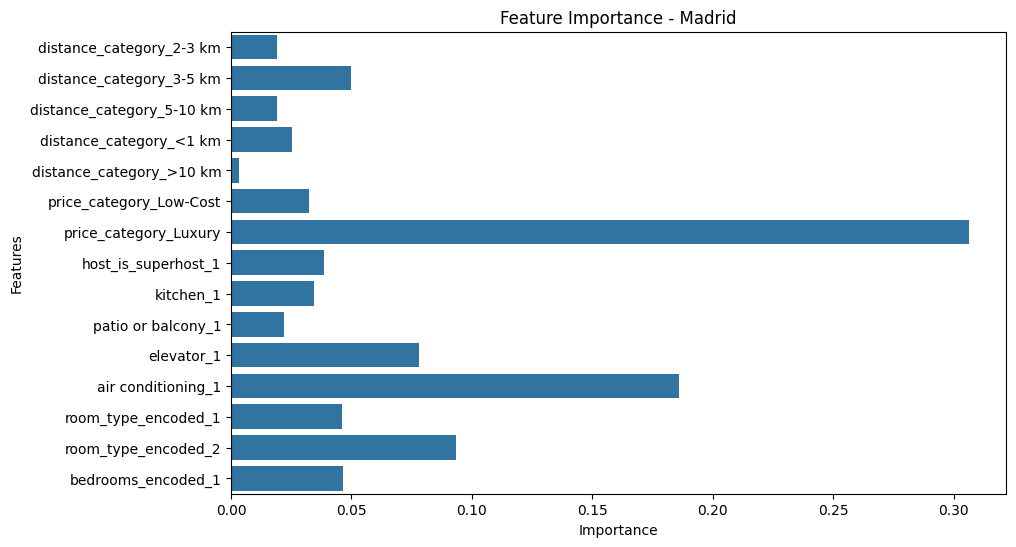

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barcelona Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model_bcn.feature_importances_, y=X_train_bcn.columns)
plt.title('Feature Importance - Barcelona')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Madrid Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model_mad.feature_importances_, y=X_train_mad.columns)
plt.title('Feature Importance - Madrid')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [7]:
import pandas as pd

bcn_ori = pd.read_csv('Datasets/datasets_originales/listings-detailed-bcn-original.csv', on_bad_lines='skip', delimiter= ",")
mad_ori = pd.read_csv('Datasets/datasets_originales/listings-detailed-mad-original.csv', on_bad_lines='skip')

bcn = pd.read_csv('Datasets/Final_cleaned_dataset/bcn_final_cleaned_data_csv.csv', on_bad_lines='skip')
mad = pd.read_csv('Datasets/Final_cleaned_dataset/mad_final_cleaned_date.csv', on_bad_lines='skip')

In [9]:
mad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26873 entries, 0 to 26872
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                             --------------  ----- 
 0   neighbourhood_group_cleansed;id;listing_url;name;host_id;host_name;calculated_host_listings_count;host_is_superhost;latitude;longitude;price;kitchen;patio or balcony;elevator;air conditioning;long_term;short_term;poss